<a href="https://colab.research.google.com/github/pabodaR/customer-segmentation/blob/main/customer_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Customer Segmentation Using K-Means Clustering**

Customer segmentation involves dividing customers into groups based on similarities to tailor marketing efforts effectively. This project uses K-Means clustering to segment customers based on annual income and spending score.

Steps:

1. **Obtain Customer Data**:
   - Use a dataset with features such as annual income and spending score to gain insights into customer behavior.

2. **Data Preprocessing**:
   - Clean and transform the raw data:
     - Handle missing values.
     - Handle duplicate values

3. **Data Analysis**:
   - Perform exploratory data analysis (EDA) to understand the data:
     - Use descriptive statistics to summarize data.
     - Visualize data with histograms, box plots, and scatter plots to identify patterns or anomalies.

4. **Determine Optimum Number of Clusters**:
   - Use the Elbow Method to find the optimal number of clusters:
     - Plot the Within-Cluster Sum of Squares (WCSS) against the number of clusters.
     - Identify the elbow point where WCSS decreases more slowly.

5. **K-Means Clustering**:
   - Apply the K-Means algorithm:
     - Partition the data into \( k \) clusters.
     - Iteratively assign data points to clusters and update centroids until convergence.

6. **Visualization**:
   - Interpret and present clustering results:
     - Use scatter plots to visualize cluster assignments.
     - Highlight centroids to understand segment central tendencies.

**Read dataset**

In [1]:
import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/portfolio/unsupervised learning/Mall_Customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


**Data preprocessing**


*   handle null values
*   handle duplicate values




In [2]:
#handle null values
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [3]:
#handle duplicates
data.duplicated().sum()

0

**Feature Engineering**

In [4]:
#remove unnecessary columns
#not needed as customer ID is unique to a customer
data.drop(['CustomerID'],axis=1,inplace=True)
data.head()

#age column and gender column are removed to directly target financial behaviors and spending patterns of customers
data.drop(['Age','Gender'],axis=1,inplace=True)
data.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


**analyze dataset**

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Annual Income (k$)      200 non-null    int64
 1   Spending Score (1-100)  200 non-null    int64
dtypes: int64(2)
memory usage: 3.2 KB


In [6]:
data.shape

(200, 2)

**Annual Income**

In [7]:
data['Annual Income (k$)'].describe()

count    200.000000
mean      60.560000
std       26.264721
min       15.000000
25%       41.500000
50%       61.500000
75%       78.000000
max      137.000000
Name: Annual Income (k$), dtype: float64

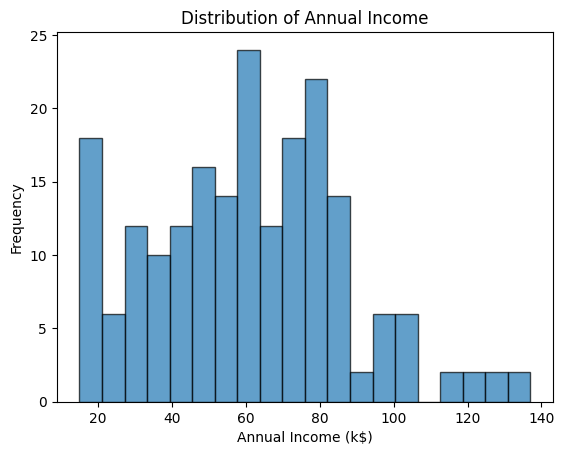

In [10]:
import matplotlib.pyplot as plt

# Histogram for Annual Income
plt.hist(data['Annual Income (k$)'], bins=20, edgecolor='k', alpha=0.7)
plt.title('Distribution of Annual Income')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Frequency')
plt.show()

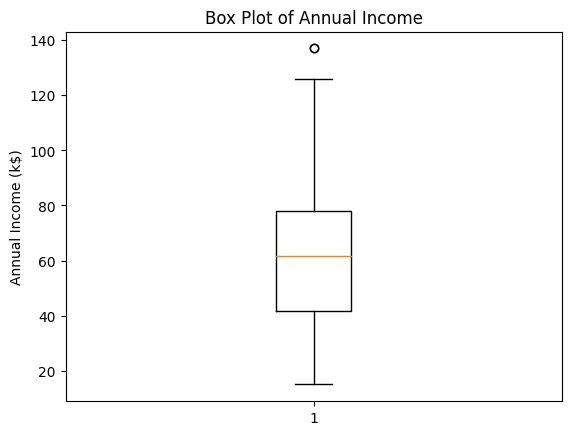

In [12]:
#box plot
plt.boxplot(data['Annual Income (k$)'])
plt.title('Box Plot of Annual Income')
plt.ylabel('Annual Income (k$)')
plt.show()

**Interpretation**:

*   There is one outlier beyond the upper whisker at around 140k$.

*   Most of the data lie betweek 20k and 120k with a median of 60k$




**Spending Score**

In [8]:
data['Spending Score (1-100)'].describe()

count    200.000000
mean      50.200000
std       25.823522
min        1.000000
25%       34.750000
50%       50.000000
75%       73.000000
max       99.000000
Name: Spending Score (1-100), dtype: float64

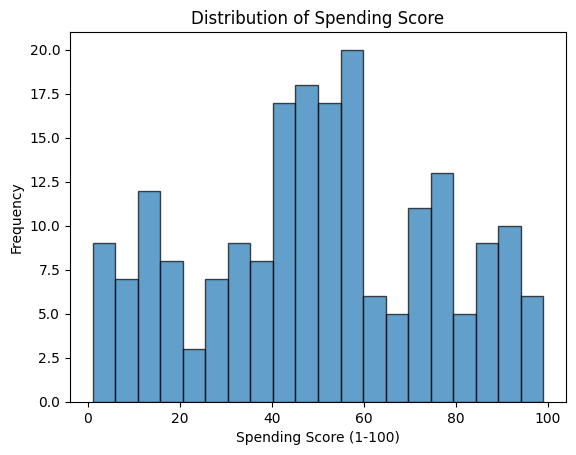

In [11]:
# Histogram for Spending Score
plt.hist(data['Spending Score (1-100)'], bins=20, edgecolor='k', alpha=0.7)
plt.title('Distribution of Spending Score')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Frequency')
plt.show()


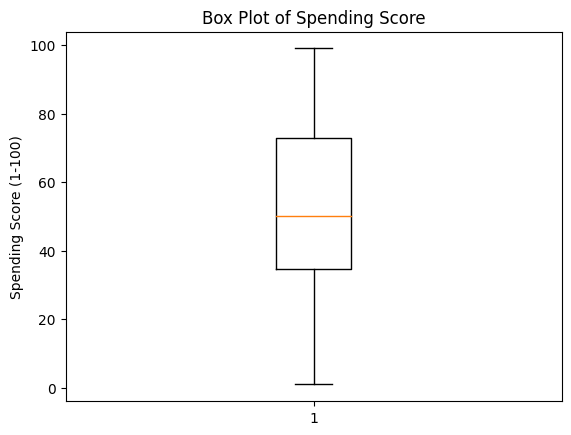

In [13]:
plt.boxplot(data['Spending Score (1-100)'])
plt.title('Box Plot of Spending Score')
plt.ylabel('Spending Score (1-100)')
plt.show()

**Interpretation:**

*    There are no outliers in the spending score data, as all data points are within the whiskers.

*   The data ranges from 0 to 100, with a median spending score around 50.



**Visualize the relationship between Annual Income and Spending Score**

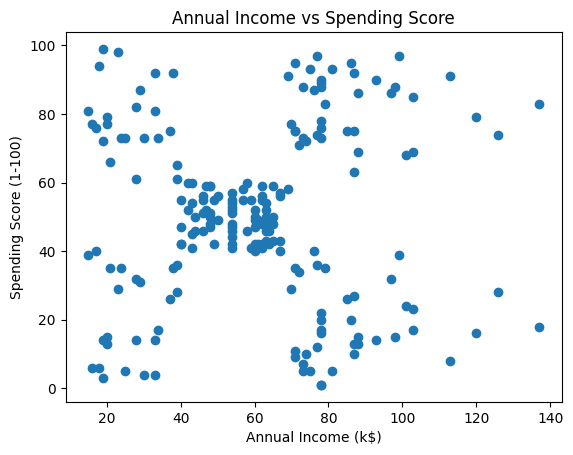

In [14]:
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'])
plt.title('Annual Income vs Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

**Interpretation:**


*   There is no clear linear relationship where customers with high incomes have a high spending score and vice versa.




**Determine the no of clusters : Within-cluster Sum of Squares**

Elbow Method: Plot the within-cluster sum of squares (WCSS) to determine the optimal number of clusters.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

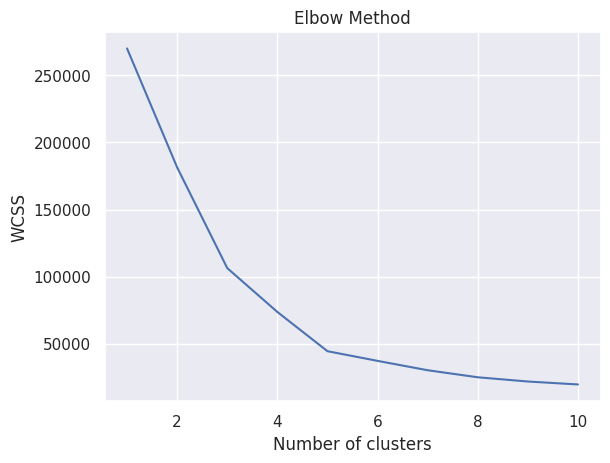

In [33]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Elbow Method
wcss = []
#checking from 1 to 10 clusters
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
sns.set()
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Two elbow points at 3 and 5.

**Optimum No of clusters: 5** (there's no significant drop after 5)

**Fit the K-means model**

In [36]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
#assign labels to clusters
Y = kmeans.fit_predict(data)
print(Y)

[2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 0 2 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 4 1 4 0 4 1 4 1 4 0 4 1 4 1 4 1 4 1 4 0 4 1 4 1 4
 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1
 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


**Visualize Clusters**

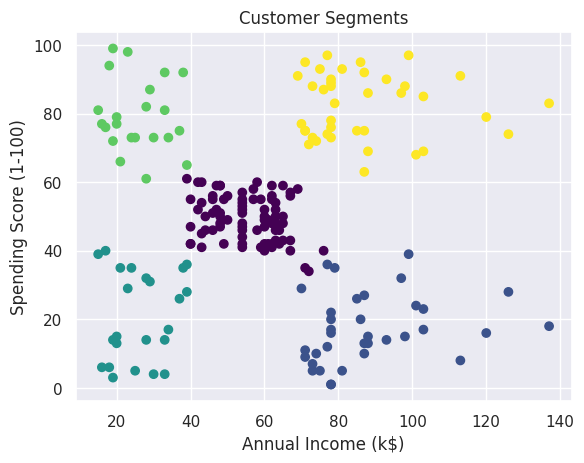

In [35]:
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], c=data['Cluster'], cmap='viridis')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segments')
plt.show()



**Insights:**


*   There are 5 groups of customers


                1.   light blue- low income and low spending score  
                2.   dark blue - high income and low spending score  
                3.   purple - medium income and medium spending score  
                4.   green - low income and high spending score  
                5.   yellow - high income and high spending score  




